In [1]:

from pymongo import MongoClient
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
import re
#from tensorflow.keras import layers
#from tensorflow import keras
#import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np

In [2]:
client = MongoClient("mongodb://localhost:27017/")  #name of the connection string 
db = client["DBLP"]             #name of the Database

#collection_dblp = db["citation_data"]    #Name of the item Name
collection_dblp = db["new_data"]
collection_arix = db["Arix"]  
# Fetch all data
cursor = collection_dblp.find()


In [3]:
df = pd.DataFrame(list(cursor)) 

In [4]:
#df.to_csv("final_dataset.csv")

In [4]:
df=df[['id','title','abstract','authors','n_citation','year','references','venue']]

In [5]:
df.head()

,id,title,abstract,authors,n_citation,year,references,venue
0,4ab3735c-80f1-472d-b953-fa0557fed28b,A new approach of 3D watermarking based on ima...,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,2008,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",international symposium on computers and commu...
1,4ab39729-af77-46f7-a662-16984fb9c1db,Attractor neural networks with activity-depend...,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,2007,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Neurocomputing
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,A characterization of balanced episturmian seq...,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,2007,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",Electronic Journal of Combinatorics
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,Exploring the space of a human action,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,2005,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",international conference on computer vision
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,Generalized upper bounds on the minimum distan...,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,2015,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Ima Journal of Mathematical Control and Inform...


In [6]:
df_null=df.copy()

In [7]:
df_null.isnull().sum()

id                 0
title              0
abstract      172467
authors            2
n_citation         0
year               0
references    124417
venue         177755
dtype: int64

In [8]:
df_null.dropna(inplace=True)

In [9]:
df_null.shape

(693622, 8)

In [10]:
df_null.drop_duplicates(subset=['id'], keep='first', inplace=True)
df_null.reset_index(drop= True,inplace = True)

In [11]:
#df_id=df_null[['id','title','abstract','n_citation','references']]
df_id = df_null[['id', 'title', 'abstract', 'n_citation', 'references']]#.sort_values(by='n_citation', ascending=False)
df_references=df_null[['id','references']]

In [12]:
df_id['original_title']=df_id['title']

C:\Users\user\AppData\Local\Temp\ipykernel_12520\3895716370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['original_title']=df_id['title']


In [13]:
df_id.dtypes

id                object
title             object
abstract          object
n_citation         int64
references        object
original_title    object
dtype: object

In [14]:
df_id=df_id.head(400000)

In [15]:
df_id1=df_id.copy()

In [16]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,4ab3735c-80f1-472d-b953-fa0557fed28b,A new approach of 3D watermarking based on ima...,"In this paper, a robust 3D triangular mesh wat...",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...
1,4ab39729-af77-46f7-a662-16984fb9c1db,Attractor neural networks with activity-depend...,We studied an autoassociative neural network w...,50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,A characterization of balanced episturmian seq...,It is well-known that Sturmian sequences are t...,50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,Exploring the space of a human action,One of the fundamental challenges of recognizi...,221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,Generalized upper bounds on the minimum distan...,This paper generalizes previous optimal upper ...,0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...


## Preprocessing Steps for Natural Language Processing (NLP)
### Text Cleaning
#### I. Converting to lowercase

In [17]:
df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\user\AppData\Local\Temp\ipykernel_12520\461851235.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_id = df_id.applymap(lambda x: x.lower() if isinstance(x, str) else x)


### II. Removing URLs

In [18]:

url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    if isinstance(text, list):
        # Join list into a single string
        text = ' '.join(text)
    return url_pattern.sub('', text)

# Apply the function to the 'title' and 'abstract' columns and create new columns 'clean_title' and 'clean_abstract'
df_id['title'] = df_id['title'].apply(remove_urls)
df_id['abstract'] = df_id['abstract'].apply(remove_urls)

### III. Removing remove non-word and non-whitespace characters

In [19]:
df_id['title'] = df_id['title'].replace(to_replace=r'[^\w\s\b\d+]', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'[^\w\s\b\d+\b]', value='', regex=True)

### IV. Removing digits

In [20]:
df_id['title'] = df_id['title'].replace(to_replace=r'\d', value='', regex=True)
df_id['abstract'] = df_id['abstract'].replace(to_replace=r'\d', value='', regex=True)

## 2. Tokenization
#### Tokenization is the process of breaking down large blocks of text such as paragraphs and sentences into smaller, more manageable units.

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [22]:
df_id['title'] = df_id['title'].apply(word_tokenize)

In [23]:
df_id['abstract'] = df_id['abstract'].apply(word_tokenize)


## 3. Stopword Removal
#### Stopwords refer to the most commonly occurring words in any natural language.

In [24]:
stop_words = set(stopwords.words('english'))
df_id['title'] = df_id['title'].apply(lambda x: [word for word in x if word not in stop_words])
df_id['abstract'] = df_id['abstract'].apply(lambda x: [word for word in x if word not in stop_words])

## 4. Stemming/Lemmatization

In [25]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]
# Apply the function to the 'text' column and create a new column 'stemmed_text'
df_id['title'] = df_id['title'].apply(stem_words)
df_id['abstract'] = df_id['abstract'].apply(stem_words)

In [26]:
#df_id=pd.read_csv("PreFile.csv")

In [27]:
df_id.head()

,id,title,abstract,n_citation,references,original_title
0,4ab3735c-80f1-472d-b953-fa0557fed28b,"[new, approach, watermark, base, imag, segment]","[paper, robust, triangular, mesh, watermark, a...",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",a new approach of 3d watermarking based on ima...
1,4ab39729-af77-46f7-a662-16984fb9c1db,"[attractor, neural, network, activitydepend, s...","[studi, autoassoci, neural, network, dynam, sy...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",attractor neural networks with activity-depend...
2,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de,"[character, balanc, episturmian, sequenc]","[wellknown, sturmian, sequenc, non, ultim, per...",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",a characterization of balanced episturmian seq...
3,4ab3a98c-3620-47ec-b578-884ecf4a6206,"[explor, space, human, action]","[one, fundament, challeng, recogn, action, acc...",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",exploring the space of a human action
4,4ab3b585-82b4-4207-91dd-b6bce7e27c4e,"[gener, upper, bound, minimum, distanc, psk, b...","[paper, gener, previou, optim, upper, bound, m...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",generalized upper bounds on the minimum distan...


# 1. Loading Preprocessing Data

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import chromadb
from chromadb.config import Settings

# Ensure the 'title' and 'abstract' columns contain strings
df_id['title'] = df_id['title'].astype(str)
df_id['abstract'] = df_id['abstract'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Concatenate title and abstract
df_id['combined_text'] = df_id['title'] + " " + df_id['abstract']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=768)  # Adjust the max_features based on your needs

# Fit and transform the combined text column
df_id['combined_embeddings'] = list(vectorizer.fit_transform(df_id['combined_text']).toarray())

# Ensure IDs are strings
df_id['id'] = df_id['id'].astype(str)



In [29]:
# import chromadb
# from chromadb.config import Settings
# import gc

# # Connect to Chroma and create a collection
# client = chromadb.Client(Settings())
# combined_collection = client.create_collection("combined_embeddings")

# # Convert numpy arrays to lists
# combined_embeddings = [emb.tolist() for emb in df_id["combined_embeddings"]]

# # Function to split data into smaller batches
# def split_into_batches(data, batch_size):
#     for i in range(0, len(data), batch_size):
#         yield data[i:i + batch_size]

# # Set a smaller batch size to reduce memory load
# batch_size = 500  # Reduce batch size for memory management

# # Split data into batches
# ids_batches = list(split_into_batches(df_id["id"].tolist(), batch_size))
# combined_embeddings_batches = list(split_into_batches(combined_embeddings, batch_size))
# combined_metadatas_batches = list(split_into_batches(df_id[["title", "abstract"]].to_dict(orient="records"), batch_size))

# # Add embeddings to the collection in batches
# for ids_batch, combined_embeddings_batch, combined_metadatas_batch in zip(ids_batches, combined_embeddings_batches, combined_metadatas_batches):
#     combined_collection.add(ids=ids_batch, embeddings=combined_embeddings_batch, metadatas=combined_metadatas_batch)
    
#     # Manually trigger garbage collection after each batch to free up memory
#     gc.collect()

# print("Embeddings added to the collection successfully.")


In [30]:
# Connect to Chroma and create a collection
client = chromadb.Client(Settings())
combined_collection = client.create_collection("combined_embeddings")

# Convert numpy arrays to lists
combined_embeddings = [emb.tolist() for emb in df_id["combined_embeddings"]]

# Split data into smaller batches
def split_into_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i + batch_size]


# Add embeddings to the collection in batches
batch_size = 100 #5461  # Set to the maximum allowed batch size
ids_batches = list(split_into_batches(df_id["id"].tolist(), batch_size))
combined_embeddings_batches = list(split_into_batches(combined_embeddings, batch_size))
combined_metadatas_batches = list(split_into_batches(df_id[["title", "abstract"]].to_dict(orient="records"), batch_size))

for ids_batch, combined_embeddings_batch, combined_metadatas_batch in zip(ids_batches, combined_embeddings_batches, combined_metadatas_batches):
    combined_collection.add(ids=ids_batch, embeddings=combined_embeddings_batch, metadatas=combined_metadatas_batch)


In [32]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Function to find the ID and title based on an exact title match
# def find_exact_title_match(title_query, df_id1):
#     for idx, row in df_id1.iterrows():
#         if row['title'].strip().lower() == title_query.strip().lower():
#             return row['id'], row['original_title']  # Return the original title for display
#     return None, None  # Return None if no exact match is found

# # Function to find and rerank similar texts using combined embeddings
# def find_and_rerank_similar_texts(user_query, top_n=5):
#     user_embedding = vectorizer.transform([user_query]).toarray().squeeze()

#     similarities = []
#     for idx, row in df_id.iterrows():
#         combined_embedding = row['combined_embeddings']

#         # Compute cosine similarity between user embedding and combined embedding
#         combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]

#         # Append the ID, original title (for display), and similarity score
#         similarities.append((row['id'], row['original_title'], combined_sim))

#     # Sort by combined similarity in descending order
#     similarities.sort(key=lambda x: x[2], reverse=True)
#     return similarities[:top_n]

# # Function to recommend papers based on user input using combined embeddings
# def recommend_articles(user_query, top_n=5):
#     # Find and rerank similar texts using combined embeddings
#     similar_texts = find_and_rerank_similar_texts(user_query, top_n)

#     recommended_articles = []
#     for id, original_title, score in similar_texts:
#         recommended_articles.append((id, original_title, score))

#     return recommended_articles

# # Example usage
# user_queries = [
#     "Distinctive Image Features from Scale-Invariant Keypoints"
# ]

# for user_query in user_queries:
#     print(f"User Input Exact Title: '{user_query}':")

#     # Check for exact title match in df_id1
#     exact_match_id, exact_match_title = find_exact_title_match(user_query, df_id1)

#     if exact_match_id is not None:
#         print(f"ID: {exact_match_id}, Title: {exact_match_title}")
#     else:
#         print(f"No exact title match found in df_id1 for '{user_query}'")

#     # Proceed with recommendation if no exact match found
#     recommended_articles = recommend_articles(user_query, top_n=5)
#     for rank, (id, original_title, score) in enumerate(recommended_articles, 1):
#         print(f"Rank {rank}: ID: {id}, Title: {original_title}, Similarity Score: {score:.4f}")


# NEXT PHASE FOR GRAPHICAL REPRESENATION

In [31]:
df_id2=df_id1[['id','references']]

Number of Recommendations: 25
  Accuracy: 8.00%
  Precision: 8.00%
  Recall: 100.00%
  F1-Score: 14.81%
  True Negatives: 0
  False Positives: 23
  False Negatives: 0
  True Positives: 2

Number of Recommendations: 50
  Accuracy: 8.00%
  Precision: 8.00%
  Recall: 100.00%
  F1-Score: 14.81%
  True Negatives: 0
  False Positives: 46
  False Negatives: 0
  True Positives: 4

Number of Recommendations: 75
  Accuracy: 6.67%
  Precision: 6.67%
  Recall: 100.00%
  F1-Score: 12.50%
  True Negatives: 0
  False Positives: 70
  False Negatives: 0
  True Positives: 5

Number of Recommendations: 100
  Accuracy: 8.00%
  Precision: 8.00%
  Recall: 100.00%
  F1-Score: 14.81%
  True Negatives: 0
  False Positives: 92
  False Negatives: 0
  True Positives: 8



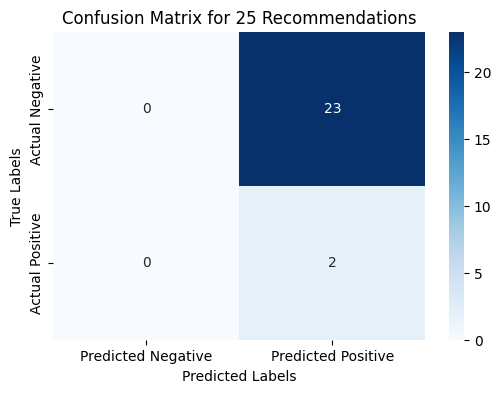

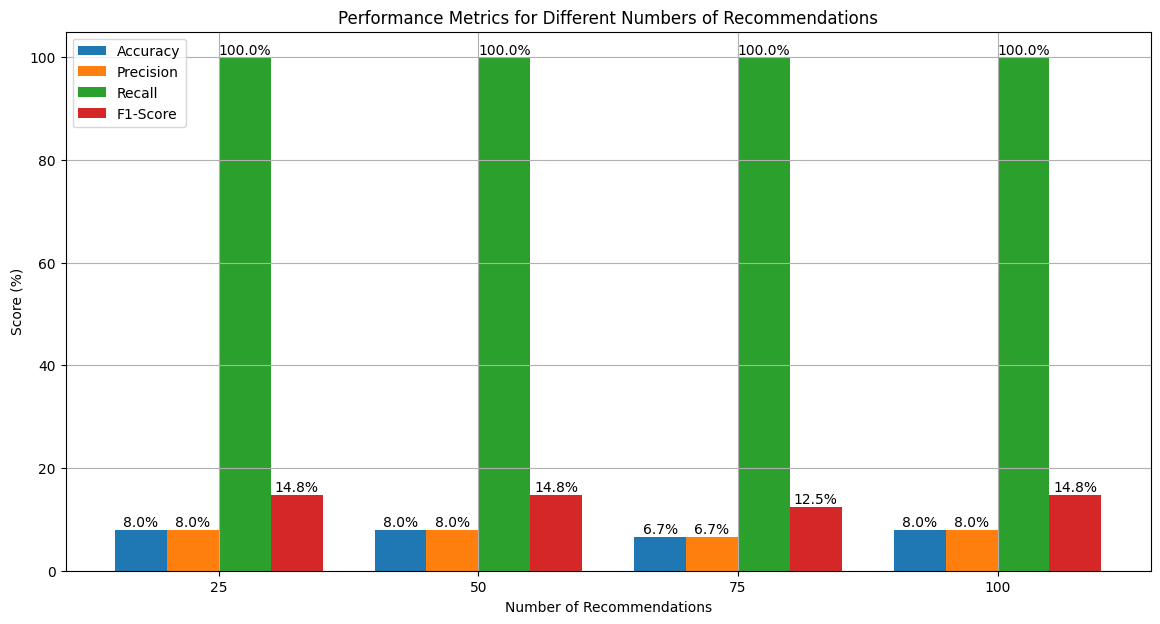

Performance Metrics Table:
   Number of Recommendations  Accuracy (%)  Precision (%)  Recall (%)  \
0                         25      8.000000       8.000000       100.0   
1                         50      8.000000       8.000000       100.0   
2                         75      6.666667       6.666667       100.0   
3                        100      8.000000       8.000000       100.0   

   F1-Score (%)  
0     14.814815  
1     14.814815  
2     12.500000  
3     14.814815  


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Function to find the ID and title based on an exact title match
def find_exact_title_match(title_query, df_id1):
    for idx, row in df_id1.iterrows():
        if row['title'].strip().lower() == title_query.strip().lower():
            return row['id'], row['original_title']  # Return the original title for display
    return None, None  # Return None if no exact match is found

# Function to find and rerank similar texts using combined embeddings
def find_and_rerank_similar_texts(user_query, top_n=5):
    user_embedding = vectorizer.transform([user_query]).toarray().squeeze()
    similarities = []
    
    for idx, row in df_id.iterrows():
        combined_embedding = row['combined_embeddings']
        combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]
        similarities.append((row['id'], row['original_title'], combined_sim))

    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_n]

# Function to recommend papers based on user input using combined embeddings
def recommend_articles(user_query, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_query, top_n)
    recommended_articles = [(id, original_title, score) for id, original_title, score in similar_texts]
    return recommended_articles

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth_df, input_id, threshold=0.2):
    y_true = []
    y_pred = []
    true_matches = []

    input_id_in_references = ground_truth_df[ground_truth_df['id'] == input_id]['references']
    for recommended_id, title, score in recommendations:
        is_relevant = False

        if not input_id_in_references.empty and recommended_id in input_id_in_references.values[0]:
            is_relevant = True
            true_matches.append(recommended_id)

        recommended_id_in_references = ground_truth_df[ground_truth_df['id'] == recommended_id]['references']
        if (not recommended_id_in_references.empty and input_id in recommended_id_in_references.values[0]):
            is_relevant = True
            true_matches.append(recommended_id)

        y_true.append(1 if is_relevant else 0)
        y_pred.append(1 if score > threshold else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)

    return accuracy, precision, recall, f1, (tn, fp, fn, tp), conf_matrix

# Function to evaluate and store results for different numbers of recommendations
def evaluate_and_store_results(user_query, ground_truth_df, df_id1, recommendation_func):
    num_recommendations = [25, 50, 75, 100]
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    tp_fps = []

    exact_match_id, _ = find_exact_title_match(user_query, df_id1)
    if exact_match_id is None:
        print(f"No exact title match found for '{user_query}' in df_id1\n")
        return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

    for n in num_recommendations:
        recommended_articles = recommendation_func(user_query, top_n=n)
        if recommended_articles:
            accuracy, precision, recall, f1, tp_fp, conf_matrix = evaluate_recommendations(recommended_articles, ground_truth_df, exact_match_id)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
            confusion_matrices.append(conf_matrix)
            tp_fps.append(tp_fp)

    return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

# Example usage
user_query = "LIBSVM: A library for support vector machines"#"Support-Vector Networks"
num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps = evaluate_and_store_results(user_query, df_references, df_id1, recommend_articles)

if accuracies:
    for i, n in enumerate(num_recommendations):
        print(f"Number of Recommendations: {n}")
        print(f"  Accuracy: {accuracies[i] * 100:.2f}%")
        print(f"  Precision: {precisions[i] * 100:.2f}%")
        print(f"  Recall: {recalls[i] * 100:.2f}%")
        print(f"  F1-Score: {f1_scores[i] * 100:.2f}%")
        tn, fp, fn, tp = tp_fps[i]
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")
        print(f"  True Positives: {tp}")
        print()

    # Plot confusion matrix for one set of recommendations (e.g., for 25 recommendations)
    tn, fp, fn, tp = tp_fps[0]
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix for 25 Recommendations')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Create a clustered bar chart for Accuracy, Precision, Recall, F1-Score
    bar_width = 0.2
    indices = np.arange(len(num_recommendations))

    plt.figure(figsize=(14, 7))
    bars_accuracy = plt.bar(indices, [acc * 100 for acc in accuracies], bar_width, label='Accuracy')
    bars_precision = plt.bar(indices + bar_width, [prec * 100 for prec in precisions], bar_width, label='Precision')
    bars_recall = plt.bar(indices + 2 * bar_width, [rec * 100 for rec in recalls], bar_width, label='Recall')
    bars_f1 = plt.bar(indices + 3 * bar_width, [f1 * 100 for f1 in f1_scores], bar_width, label='F1-Score')

    plt.xlabel('Number of Recommendations')
    plt.ylabel('Score (%)')
    plt.title('Performance Metrics for Different Numbers of Recommendations')
    plt.xticks(indices + 1.5 * bar_width, num_recommendations)

    def add_text_annotations(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

    add_text_annotations(bars_accuracy)
    add_text_annotations(bars_precision)
    add_text_annotations(bars_recall)
    add_text_annotations(bars_f1)

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display a table of the results
    results_df = pd.DataFrame({
        'Number of Recommendations': num_recommendations,
        'Accuracy (%)': [acc * 100 for acc in accuracies],
        'Precision (%)': [prec * 100 for prec in precisions],
        'Recall (%)': [rec * 100 for rec in recalls],
        'F1-Score (%)': [f1 * 100 for f1 in f1_scores]
    })

    print("Performance Metrics Table:")
    print(results_df)
else:
    print("No recommendations evaluated.")


Number of Recommendations: 25
  Accuracy: 20.00%
  Precision: 20.00%
  Recall: 100.00%
  F1-Score: 33.33%
  True Negatives: 0
  False Positives: 20
  False Negatives: 0
  True Positives: 5

Number of Recommendations: 50
  Accuracy: 14.00%
  Precision: 14.00%
  Recall: 100.00%
  F1-Score: 24.56%
  True Negatives: 0
  False Positives: 43
  False Negatives: 0
  True Positives: 7

Number of Recommendations: 75
  Accuracy: 9.33%
  Precision: 9.33%
  Recall: 100.00%
  F1-Score: 17.07%
  True Negatives: 0
  False Positives: 68
  False Negatives: 0
  True Positives: 7

Number of Recommendations: 100
  Accuracy: 9.00%
  Precision: 9.00%
  Recall: 100.00%
  F1-Score: 16.51%
  True Negatives: 0
  False Positives: 91
  False Negatives: 0
  True Positives: 9



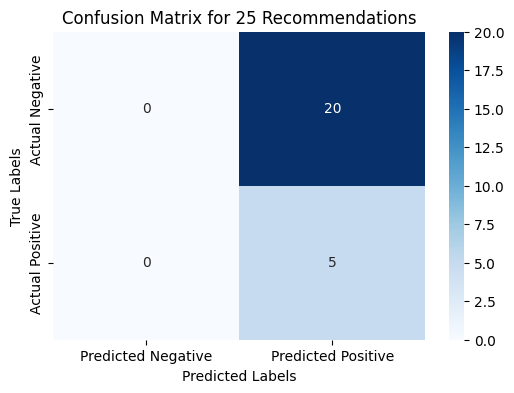

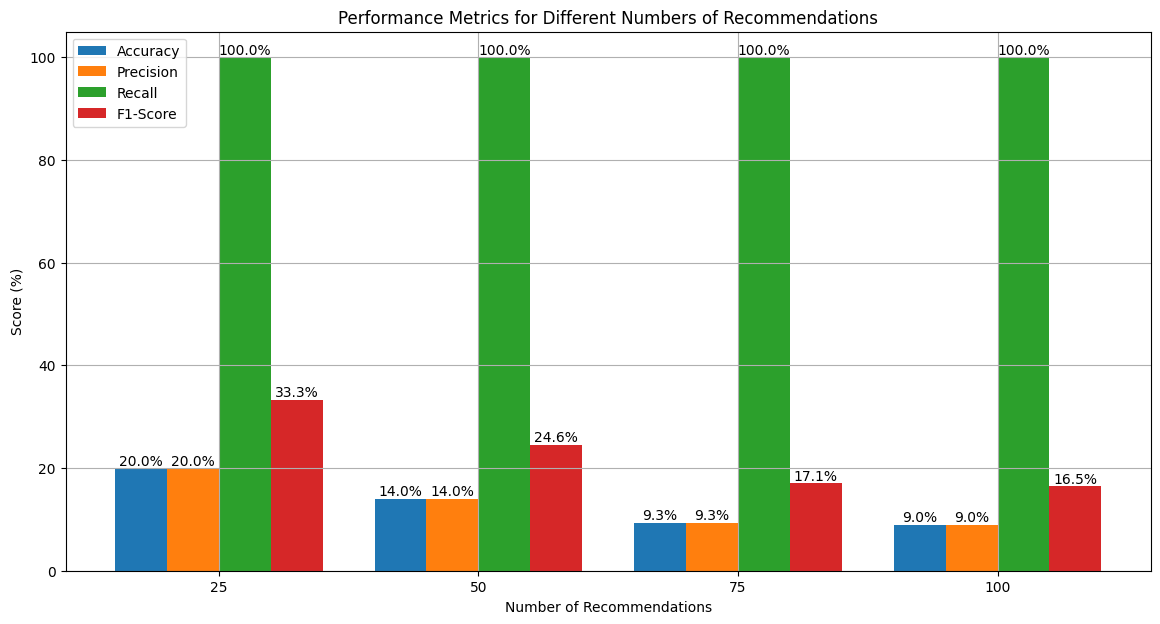

Performance Metrics Table:
   Number of Recommendations  Accuracy (%)  Precision (%)  Recall (%)  \
0                         25     20.000000      20.000000       100.0   
1                         50     14.000000      14.000000       100.0   
2                         75      9.333333       9.333333       100.0   
3                        100      9.000000       9.000000       100.0   

   F1-Score (%)  
0     33.333333  
1     24.561404  
2     17.073171  
3     16.513761  


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Function to find the ID and title based on an exact title match
def find_exact_title_match(title_query, df_id1):
    for idx, row in df_id1.iterrows():
        if row['title'].strip().lower() == title_query.strip().lower():
            return row['id'], row['original_title']  # Return the original title for display
    return None, None  # Return None if no exact match is found

# Function to find and rerank similar texts using combined embeddings
def find_and_rerank_similar_texts(user_query, top_n=5):
    user_embedding = vectorizer.transform([user_query]).toarray().squeeze()
    similarities = []
    
    for idx, row in df_id.iterrows():
        combined_embedding = row['combined_embeddings']
        combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]
        similarities.append((row['id'], row['original_title'], combined_sim))

    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_n]

# Function to recommend papers based on user input using combined embeddings
def recommend_articles(user_query, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_query, top_n)
    recommended_articles = [(id, original_title, score) for id, original_title, score in similar_texts]
    return recommended_articles

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth_df, input_id, threshold=0.2):
    y_true = []
    y_pred = []
    true_matches = []

    input_id_in_references = ground_truth_df[ground_truth_df['id'] == input_id]['references']
    for recommended_id, title, score in recommendations:
        is_relevant = False

        if not input_id_in_references.empty and recommended_id in input_id_in_references.values[0]:
            is_relevant = True
            true_matches.append(recommended_id)

        recommended_id_in_references = ground_truth_df[ground_truth_df['id'] == recommended_id]['references']
        if (not recommended_id_in_references.empty and input_id in recommended_id_in_references.values[0]):
            is_relevant = True
            true_matches.append(recommended_id)

        y_true.append(1 if is_relevant else 0)
        y_pred.append(1 if score > threshold else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)

    return accuracy, precision, recall, f1, (tn, fp, fn, tp), conf_matrix

# Function to evaluate and store results for different numbers of recommendations
def evaluate_and_store_results(user_query, ground_truth_df, df_id1, recommendation_func):
    num_recommendations = [25, 50, 75, 100]
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    tp_fps = []

    exact_match_id, _ = find_exact_title_match(user_query, df_id1)
    if exact_match_id is None:
        print(f"No exact title match found for '{user_query}' in df_id1\n")
        return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

    for n in num_recommendations:
        recommended_articles = recommendation_func(user_query, top_n=n)
        if recommended_articles:
            accuracy, precision, recall, f1, tp_fp, conf_matrix = evaluate_recommendations(recommended_articles, ground_truth_df, exact_match_id)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
            confusion_matrices.append(conf_matrix)
            tp_fps.append(tp_fp)

    return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

# Example usage
user_query = "Support-Vector Networks"
num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps = evaluate_and_store_results(user_query, df_references, df_id1, recommend_articles)

if accuracies:
    for i, n in enumerate(num_recommendations):
        print(f"Number of Recommendations: {n}")
        print(f"  Accuracy: {accuracies[i] * 100:.2f}%")
        print(f"  Precision: {precisions[i] * 100:.2f}%")
        print(f"  Recall: {recalls[i] * 100:.2f}%")
        print(f"  F1-Score: {f1_scores[i] * 100:.2f}%")
        tn, fp, fn, tp = tp_fps[i]
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")
        print(f"  True Positives: {tp}")
        print()

    # Plot confusion matrix for one set of recommendations (e.g., for 25 recommendations)
    tn, fp, fn, tp = tp_fps[0]
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix for 25 Recommendations')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Create a clustered bar chart for Accuracy, Precision, Recall, F1-Score
    bar_width = 0.2
    indices = np.arange(len(num_recommendations))

    plt.figure(figsize=(14, 7))
    bars_accuracy = plt.bar(indices, [acc * 100 for acc in accuracies], bar_width, label='Accuracy')
    bars_precision = plt.bar(indices + bar_width, [prec * 100 for prec in precisions], bar_width, label='Precision')
    bars_recall = plt.bar(indices + 2 * bar_width, [rec * 100 for rec in recalls], bar_width, label='Recall')
    bars_f1 = plt.bar(indices + 3 * bar_width, [f1 * 100 for f1 in f1_scores], bar_width, label='F1-Score')

    plt.xlabel('Number of Recommendations')
    plt.ylabel('Score (%)')
    plt.title('Performance Metrics for Different Numbers of Recommendations')
    plt.xticks(indices + 1.5 * bar_width, num_recommendations)

    def add_text_annotations(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

    add_text_annotations(bars_accuracy)
    add_text_annotations(bars_precision)
    add_text_annotations(bars_recall)
    add_text_annotations(bars_f1)

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display a table of the results
    results_df = pd.DataFrame({
        'Number of Recommendations': num_recommendations,
        'Accuracy (%)': [acc * 100 for acc in accuracies],
        'Precision (%)': [prec * 100 for prec in precisions],
        'Recall (%)': [rec * 100 for rec in recalls],
        'F1-Score (%)': [f1 * 100 for f1 in f1_scores]
    })

    print("Performance Metrics Table:")
    print(results_df)
else:
    print("No recommendations evaluated.")


Number of Recommendations: 25
  Accuracy: 16.00%
  Precision: 16.00%
  Recall: 100.00%
  F1-Score: 27.59%
  True Negatives: 0
  False Positives: 21
  False Negatives: 0
  True Positives: 4

Number of Recommendations: 50
  Accuracy: 14.00%
  Precision: 14.00%
  Recall: 100.00%
  F1-Score: 24.56%
  True Negatives: 0
  False Positives: 43
  False Negatives: 0
  True Positives: 7

Number of Recommendations: 75
  Accuracy: 10.67%
  Precision: 10.67%
  Recall: 100.00%
  F1-Score: 19.28%
  True Negatives: 0
  False Positives: 67
  False Negatives: 0
  True Positives: 8

Number of Recommendations: 100
  Accuracy: 11.00%
  Precision: 11.00%
  Recall: 100.00%
  F1-Score: 19.82%
  True Negatives: 0
  False Positives: 89
  False Negatives: 0
  True Positives: 11



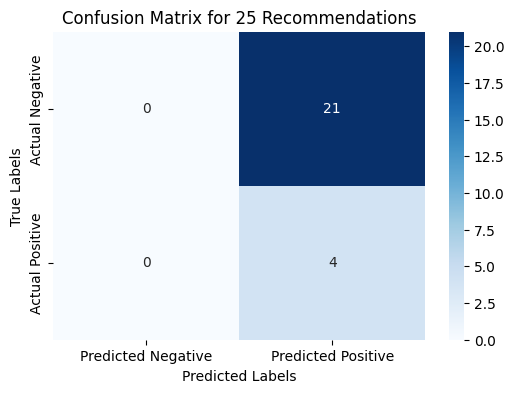

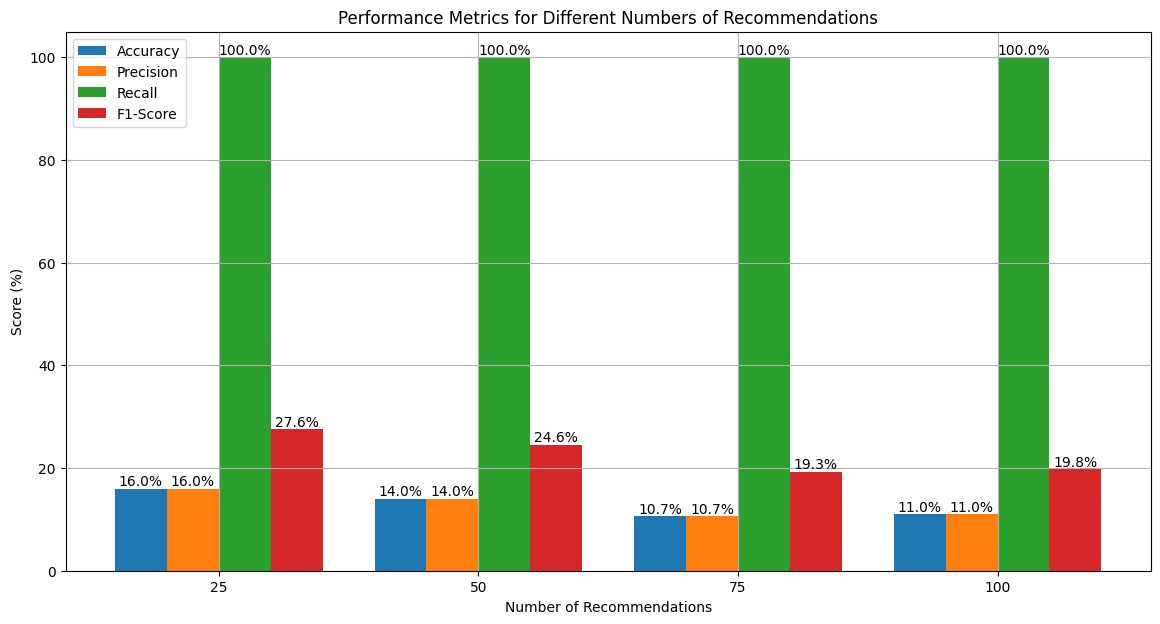

Performance Metrics Table:
   Number of Recommendations  Accuracy (%)  Precision (%)  Recall (%)  \
0                         25     16.000000      16.000000       100.0   
1                         50     14.000000      14.000000       100.0   
2                         75     10.666667      10.666667       100.0   
3                        100     11.000000      11.000000       100.0   

   F1-Score (%)  
0     27.586207  
1     24.561404  
2     19.277108  
3     19.819820  


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Function to find the ID and title based on an exact title match
def find_exact_title_match(title_query, df_id1):
    for idx, row in df_id1.iterrows():
        if row['title'].strip().lower() == title_query.strip().lower():
            return row['id'], row['original_title']  # Return the original title for display
    return None, None  # Return None if no exact match is found

# Function to find and rerank similar texts using combined embeddings
def find_and_rerank_similar_texts(user_query, top_n=5):
    user_embedding = vectorizer.transform([user_query]).toarray().squeeze()
    similarities = []
    
    for idx, row in df_id.iterrows():
        combined_embedding = row['combined_embeddings']
        combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]
        similarities.append((row['id'], row['original_title'], combined_sim))

    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_n]

# Function to recommend papers based on user input using combined embeddings
def recommend_articles(user_query, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_query, top_n)
    recommended_articles = [(id, original_title, score) for id, original_title, score in similar_texts]
    return recommended_articles

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth_df, input_id, threshold=0.2):
    y_true = []
    y_pred = []
    true_matches = []

    input_id_in_references = ground_truth_df[ground_truth_df['id'] == input_id]['references']
    for recommended_id, title, score in recommendations:
        is_relevant = False

        if not input_id_in_references.empty and recommended_id in input_id_in_references.values[0]:
            is_relevant = True
            true_matches.append(recommended_id)

        recommended_id_in_references = ground_truth_df[ground_truth_df['id'] == recommended_id]['references']
        if (not recommended_id_in_references.empty and input_id in recommended_id_in_references.values[0]):
            is_relevant = True
            true_matches.append(recommended_id)

        y_true.append(1 if is_relevant else 0)
        y_pred.append(1 if score > threshold else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)

    return accuracy, precision, recall, f1, (tn, fp, fn, tp), conf_matrix

# Function to evaluate and store results for different numbers of recommendations
def evaluate_and_store_results(user_query, ground_truth_df, df_id1, recommendation_func):
    num_recommendations = [25, 50, 75, 100]
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    tp_fps = []

    exact_match_id, _ = find_exact_title_match(user_query, df_id1)
    if exact_match_id is None:
        print(f"No exact title match found for '{user_query}' in df_id1\n")
        return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

    for n in num_recommendations:
        recommended_articles = recommendation_func(user_query, top_n=n)
        if recommended_articles:
            accuracy, precision, recall, f1, tp_fp, conf_matrix = evaluate_recommendations(recommended_articles, ground_truth_df, exact_match_id)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
            confusion_matrices.append(conf_matrix)
            tp_fps.append(tp_fp)

    return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

# Example usage
user_query = "A Tutorial on Support Vector Machines for Pattern Recognition"
num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps = evaluate_and_store_results(user_query, df_references, df_id1, recommend_articles)

if accuracies:
    for i, n in enumerate(num_recommendations):
        print(f"Number of Recommendations: {n}")
        print(f"  Accuracy: {accuracies[i] * 100:.2f}%")
        print(f"  Precision: {precisions[i] * 100:.2f}%")
        print(f"  Recall: {recalls[i] * 100:.2f}%")
        print(f"  F1-Score: {f1_scores[i] * 100:.2f}%")
        tn, fp, fn, tp = tp_fps[i]
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")
        print(f"  True Positives: {tp}")
        print()

    # Plot confusion matrix for one set of recommendations (e.g., for 25 recommendations)
    tn, fp, fn, tp = tp_fps[0]
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix for 25 Recommendations')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Create a clustered bar chart for Accuracy, Precision, Recall, F1-Score
    bar_width = 0.2
    indices = np.arange(len(num_recommendations))

    plt.figure(figsize=(14, 7))
    bars_accuracy = plt.bar(indices, [acc * 100 for acc in accuracies], bar_width, label='Accuracy')
    bars_precision = plt.bar(indices + bar_width, [prec * 100 for prec in precisions], bar_width, label='Precision')
    bars_recall = plt.bar(indices + 2 * bar_width, [rec * 100 for rec in recalls], bar_width, label='Recall')
    bars_f1 = plt.bar(indices + 3 * bar_width, [f1 * 100 for f1 in f1_scores], bar_width, label='F1-Score')

    plt.xlabel('Number of Recommendations')
    plt.ylabel('Score (%)')
    plt.title('Performance Metrics for Different Numbers of Recommendations')
    plt.xticks(indices + 1.5 * bar_width, num_recommendations)

    def add_text_annotations(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

    add_text_annotations(bars_accuracy)
    add_text_annotations(bars_precision)
    add_text_annotations(bars_recall)
    add_text_annotations(bars_f1)

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display a table of the results
    results_df = pd.DataFrame({
        'Number of Recommendations': num_recommendations,
        'Accuracy (%)': [acc * 100 for acc in accuracies],
        'Precision (%)': [prec * 100 for prec in precisions],
        'Recall (%)': [rec * 100 for rec in recalls],
        'F1-Score (%)': [f1 * 100 for f1 in f1_scores]
    })

    print("Performance Metrics Table:")
    print(results_df)
else:
    print("No recommendations evaluated.")


Number of Recommendations: 25
  Accuracy: 16.00%
  Precision: 16.00%
  Recall: 100.00%
  F1-Score: 27.59%
  True Negatives: 0
  False Positives: 21
  False Negatives: 0
  True Positives: 4

Number of Recommendations: 50
  Accuracy: 14.00%
  Precision: 14.00%
  Recall: 100.00%
  F1-Score: 24.56%
  True Negatives: 0
  False Positives: 43
  False Negatives: 0
  True Positives: 7

Number of Recommendations: 75
  Accuracy: 12.00%
  Precision: 12.00%
  Recall: 100.00%
  F1-Score: 21.43%
  True Negatives: 0
  False Positives: 66
  False Negatives: 0
  True Positives: 9

Number of Recommendations: 100
  Accuracy: 12.00%
  Precision: 12.00%
  Recall: 100.00%
  F1-Score: 21.43%
  True Negatives: 0
  False Positives: 88
  False Negatives: 0
  True Positives: 12



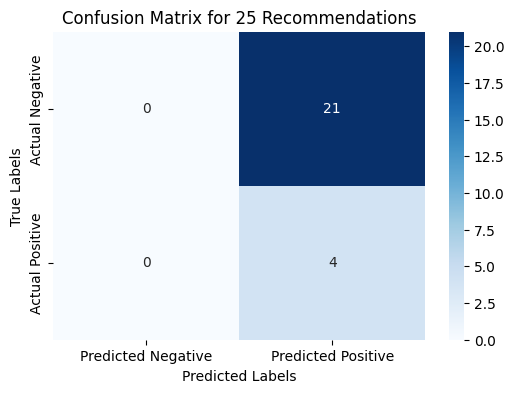

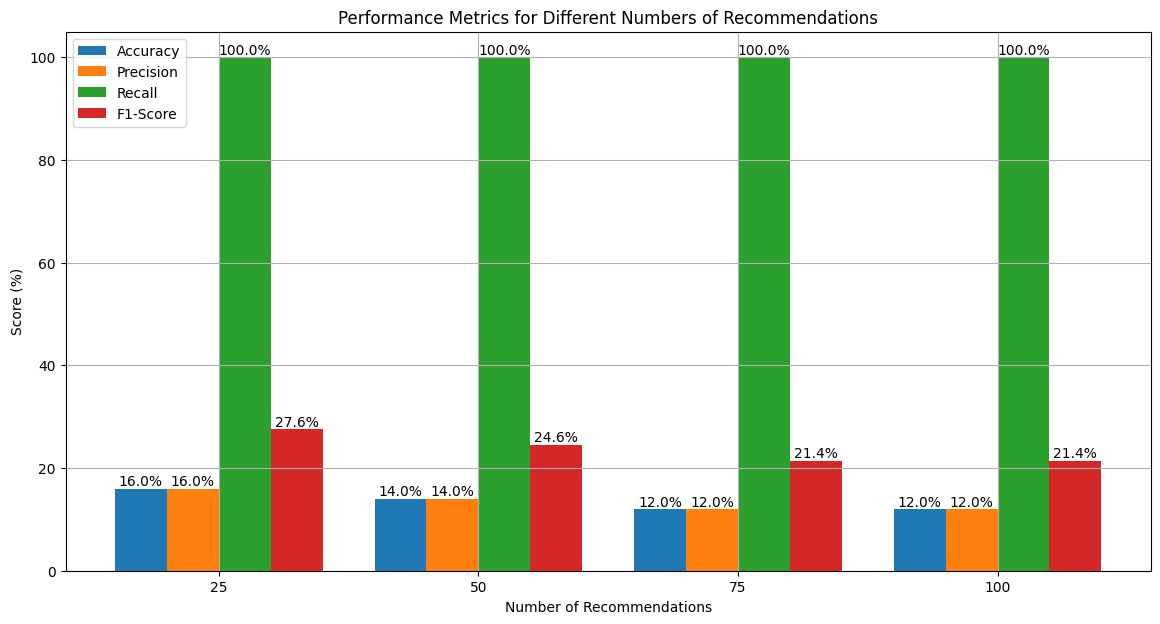

Performance Metrics Table:
   Number of Recommendations  Accuracy (%)  Precision (%)  Recall (%)  \
0                         25          16.0           16.0       100.0   
1                         50          14.0           14.0       100.0   
2                         75          12.0           12.0       100.0   
3                        100          12.0           12.0       100.0   

   F1-Score (%)  
0     27.586207  
1     24.561404  
2     21.428571  
3     21.428571  


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Function to find the ID and title based on an exact title match
def find_exact_title_match(title_query, df_id1):
    for idx, row in df_id1.iterrows():
        if row['title'].strip().lower() == title_query.strip().lower():
            return row['id'], row['original_title']  # Return the original title for display
    return None, None  # Return None if no exact match is found

# Function to find and rerank similar texts using combined embeddings
def find_and_rerank_similar_texts(user_query, top_n=5):
    user_embedding = vectorizer.transform([user_query]).toarray().squeeze()
    similarities = []
    
    for idx, row in df_id.iterrows():
        combined_embedding = row['combined_embeddings']
        combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]
        similarities.append((row['id'], row['original_title'], combined_sim))

    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_n]

# Function to recommend papers based on user input using combined embeddings
def recommend_articles(user_query, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_query, top_n)
    recommended_articles = [(id, original_title, score) for id, original_title, score in similar_texts]
    return recommended_articles

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth_df, input_id, threshold=0.2):
    y_true = []
    y_pred = []
    true_matches = []

    input_id_in_references = ground_truth_df[ground_truth_df['id'] == input_id]['references']
    for recommended_id, title, score in recommendations:
        is_relevant = False

        if not input_id_in_references.empty and recommended_id in input_id_in_references.values[0]:
            is_relevant = True
            true_matches.append(recommended_id)

        recommended_id_in_references = ground_truth_df[ground_truth_df['id'] == recommended_id]['references']
        if (not recommended_id_in_references.empty and input_id in recommended_id_in_references.values[0]):
            is_relevant = True
            true_matches.append(recommended_id)

        y_true.append(1 if is_relevant else 0)
        y_pred.append(1 if score > threshold else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)

    return accuracy, precision, recall, f1, (tn, fp, fn, tp), conf_matrix

# Function to evaluate and store results for different numbers of recommendations
def evaluate_and_store_results(user_query, ground_truth_df, df_id1, recommendation_func):
    num_recommendations = [25, 50, 75, 100]
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    tp_fps = []

    exact_match_id, _ = find_exact_title_match(user_query, df_id1)
    if exact_match_id is None:
        print(f"No exact title match found for '{user_query}' in df_id1\n")
        return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

    for n in num_recommendations:
        recommended_articles = recommendation_func(user_query, top_n=n)
        if recommended_articles:
            accuracy, precision, recall, f1, tp_fp, conf_matrix = evaluate_recommendations(recommended_articles, ground_truth_df, exact_match_id)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
            confusion_matrices.append(conf_matrix)
            tp_fps.append(tp_fp)

    return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

# Example usage
user_query = "Gene Selection for Cancer Classification using Support Vector Machines"
num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps = evaluate_and_store_results(user_query, df_references, df_id1, recommend_articles)

if accuracies:
    for i, n in enumerate(num_recommendations):
        print(f"Number of Recommendations: {n}")
        print(f"  Accuracy: {accuracies[i] * 100:.2f}%")
        print(f"  Precision: {precisions[i] * 100:.2f}%")
        print(f"  Recall: {recalls[i] * 100:.2f}%")
        print(f"  F1-Score: {f1_scores[i] * 100:.2f}%")
        tn, fp, fn, tp = tp_fps[i]
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")
        print(f"  True Positives: {tp}")
        print()

    # Plot confusion matrix for one set of recommendations (e.g., for 25 recommendations)
    tn, fp, fn, tp = tp_fps[0]
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix for 25 Recommendations')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Create a clustered bar chart for Accuracy, Precision, Recall, F1-Score
    bar_width = 0.2
    indices = np.arange(len(num_recommendations))

    plt.figure(figsize=(14, 7))
    bars_accuracy = plt.bar(indices, [acc * 100 for acc in accuracies], bar_width, label='Accuracy')
    bars_precision = plt.bar(indices + bar_width, [prec * 100 for prec in precisions], bar_width, label='Precision')
    bars_recall = plt.bar(indices + 2 * bar_width, [rec * 100 for rec in recalls], bar_width, label='Recall')
    bars_f1 = plt.bar(indices + 3 * bar_width, [f1 * 100 for f1 in f1_scores], bar_width, label='F1-Score')

    plt.xlabel('Number of Recommendations')
    plt.ylabel('Score (%)')
    plt.title('Performance Metrics for Different Numbers of Recommendations')
    plt.xticks(indices + 1.5 * bar_width, num_recommendations)

    def add_text_annotations(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

    add_text_annotations(bars_accuracy)
    add_text_annotations(bars_precision)
    add_text_annotations(bars_recall)
    add_text_annotations(bars_f1)

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display a table of the results
    results_df = pd.DataFrame({
        'Number of Recommendations': num_recommendations,
        'Accuracy (%)': [acc * 100 for acc in accuracies],
        'Precision (%)': [prec * 100 for prec in precisions],
        'Recall (%)': [rec * 100 for rec in recalls],
        'F1-Score (%)': [f1 * 100 for f1 in f1_scores]
    })

    print("Performance Metrics Table:")
    print(results_df)
else:
    print("No recommendations evaluated.")


Number of Recommendations: 25
  Accuracy: 20.00%
  Precision: 20.00%
  Recall: 100.00%
  F1-Score: 33.33%
  True Negatives: 0
  False Positives: 20
  False Negatives: 0
  True Positives: 5

Number of Recommendations: 50
  Accuracy: 18.00%
  Precision: 18.00%
  Recall: 100.00%
  F1-Score: 30.51%
  True Negatives: 0
  False Positives: 41
  False Negatives: 0
  True Positives: 9

Number of Recommendations: 75
  Accuracy: 17.33%
  Precision: 17.33%
  Recall: 100.00%
  F1-Score: 29.55%
  True Negatives: 0
  False Positives: 62
  False Negatives: 0
  True Positives: 13

Number of Recommendations: 100
  Accuracy: 16.00%
  Precision: 16.00%
  Recall: 100.00%
  F1-Score: 27.59%
  True Negatives: 0
  False Positives: 84
  False Negatives: 0
  True Positives: 16



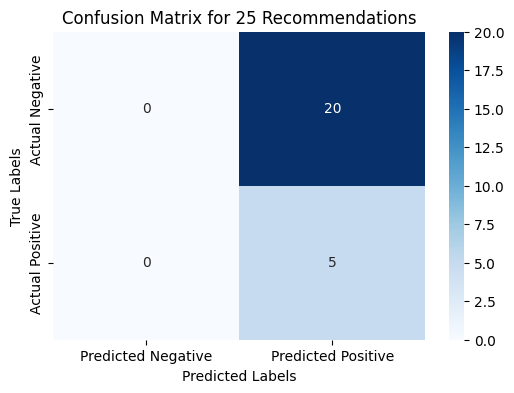

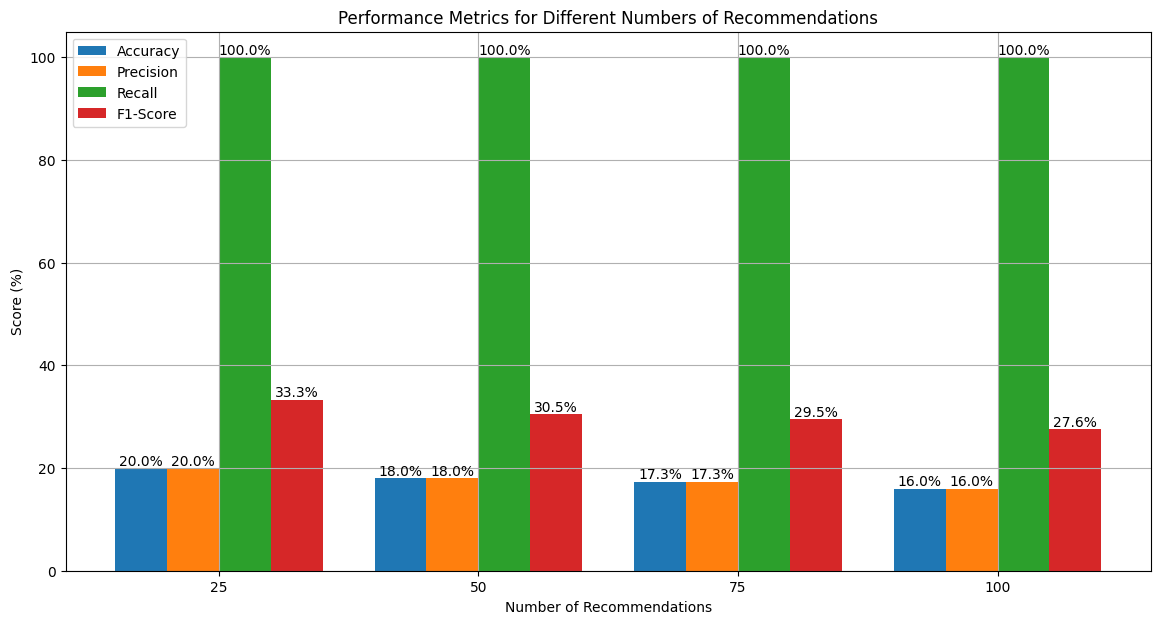

Performance Metrics Table:
   Number of Recommendations  Accuracy (%)  Precision (%)  Recall (%)  \
0                         25     20.000000      20.000000       100.0   
1                         50     18.000000      18.000000       100.0   
2                         75     17.333333      17.333333       100.0   
3                        100     16.000000      16.000000       100.0   

   F1-Score (%)  
0     33.333333  
1     30.508475  
2     29.545455  
3     27.586207  


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

# Function to find the ID and title based on an exact title match
def find_exact_title_match(title_query, df_id1):
    for idx, row in df_id1.iterrows():
        if row['title'].strip().lower() == title_query.strip().lower():
            return row['id'], row['original_title']  # Return the original title for display
    return None, None  # Return None if no exact match is found

# Function to find and rerank similar texts using combined embeddings
def find_and_rerank_similar_texts(user_query, top_n=5):
    user_embedding = vectorizer.transform([user_query]).toarray().squeeze()
    similarities = []
    
    for idx, row in df_id.iterrows():
        combined_embedding = row['combined_embeddings']
        combined_sim = cosine_similarity([user_embedding], [combined_embedding])[0][0]
        similarities.append((row['id'], row['original_title'], combined_sim))

    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_n]

# Function to recommend papers based on user input using combined embeddings
def recommend_articles(user_query, top_n=5):
    similar_texts = find_and_rerank_similar_texts(user_query, top_n)
    recommended_articles = [(id, original_title, score) for id, original_title, score in similar_texts]
    return recommended_articles

# Function to evaluate recommendations
def evaluate_recommendations(recommendations, ground_truth_df, input_id, threshold=0.2):
    y_true = []
    y_pred = []
    true_matches = []

    input_id_in_references = ground_truth_df[ground_truth_df['id'] == input_id]['references']
    for recommended_id, title, score in recommendations:
        is_relevant = False

        if not input_id_in_references.empty and recommended_id in input_id_in_references.values[0]:
            is_relevant = True
            true_matches.append(recommended_id)

        recommended_id_in_references = ground_truth_df[ground_truth_df['id'] == recommended_id]['references']
        if (not recommended_id_in_references.empty and input_id in recommended_id_in_references.values[0]):
            is_relevant = True
            true_matches.append(recommended_id)

        y_true.append(1 if is_relevant else 0)
        y_pred.append(1 if score > threshold else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel() if conf_matrix.size == 4 else (0, 0, 0, 0)

    return accuracy, precision, recall, f1, (tn, fp, fn, tp), conf_matrix

# Function to evaluate and store results for different numbers of recommendations
def evaluate_and_store_results(user_query, ground_truth_df, df_id1, recommendation_func):
    num_recommendations = [25, 50, 75, 100]
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    tp_fps = []

    exact_match_id, _ = find_exact_title_match(user_query, df_id1)
    if exact_match_id is None:
        print(f"No exact title match found for '{user_query}' in df_id1\n")
        return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

    for n in num_recommendations:
        recommended_articles = recommendation_func(user_query, top_n=n)
        if recommended_articles:
            accuracy, precision, recall, f1, tp_fp, conf_matrix = evaluate_recommendations(recommended_articles, ground_truth_df, exact_match_id)
            accuracies.append(accuracy)
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
            confusion_matrices.append(conf_matrix)
            tp_fps.append(tp_fp)

    return num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps

# Example usage
user_query = "Identification and control of dynamical systems using neural networks"
num_recommendations, accuracies, precisions, recalls, f1_scores, confusion_matrices, tp_fps = evaluate_and_store_results(user_query, df_references, df_id1, recommend_articles)

if accuracies:
    for i, n in enumerate(num_recommendations):
        print(f"Number of Recommendations: {n}")
        print(f"  Accuracy: {accuracies[i] * 100:.2f}%")
        print(f"  Precision: {precisions[i] * 100:.2f}%")
        print(f"  Recall: {recalls[i] * 100:.2f}%")
        print(f"  F1-Score: {f1_scores[i] * 100:.2f}%")
        tn, fp, fn, tp = tp_fps[i]
        print(f"  True Negatives: {tn}")
        print(f"  False Positives: {fp}")
        print(f"  False Negatives: {fn}")
        print(f"  True Positives: {tp}")
        print()

    # Plot confusion matrix for one set of recommendations (e.g., for 25 recommendations)
    tn, fp, fn, tp = tp_fps[0]
    conf_matrix = np.array([[tn, fp], [fn, tp]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix for 25 Recommendations')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Create a clustered bar chart for Accuracy, Precision, Recall, F1-Score
    bar_width = 0.2
    indices = np.arange(len(num_recommendations))

    plt.figure(figsize=(14, 7))
    bars_accuracy = plt.bar(indices, [acc * 100 for acc in accuracies], bar_width, label='Accuracy')
    bars_precision = plt.bar(indices + bar_width, [prec * 100 for prec in precisions], bar_width, label='Precision')
    bars_recall = plt.bar(indices + 2 * bar_width, [rec * 100 for rec in recalls], bar_width, label='Recall')
    bars_f1 = plt.bar(indices + 3 * bar_width, [f1 * 100 for f1 in f1_scores], bar_width, label='F1-Score')

    plt.xlabel('Number of Recommendations')
    plt.ylabel('Score (%)')
    plt.title('Performance Metrics for Different Numbers of Recommendations')
    plt.xticks(indices + 1.5 * bar_width, num_recommendations)

    def add_text_annotations(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

    add_text_annotations(bars_accuracy)
    add_text_annotations(bars_precision)
    add_text_annotations(bars_recall)
    add_text_annotations(bars_f1)

    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and display a table of the results
    results_df = pd.DataFrame({
        'Number of Recommendations': num_recommendations,
        'Accuracy (%)': [acc * 100 for acc in accuracies],
        'Precision (%)': [prec * 100 for prec in precisions],
        'Recall (%)': [rec * 100 for rec in recalls],
        'F1-Score (%)': [f1 * 100 for f1 in f1_scores]
    })

    print("Performance Metrics Table:")
    print(results_df)
else:
    print("No recommendations evaluated.")


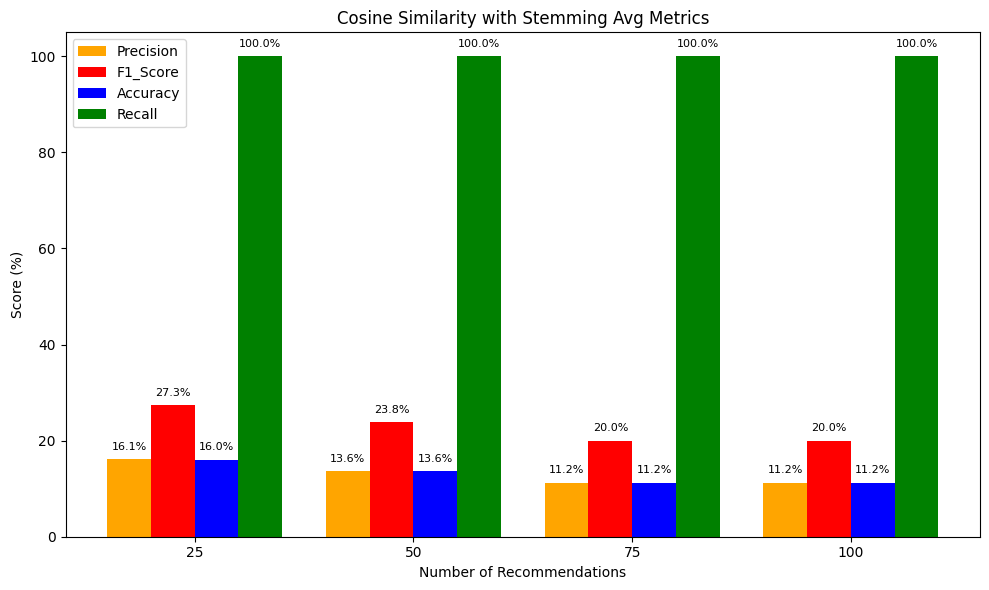

In [34]:
import matplotlib.pyplot as plt
import numpy as np


results = {
    'Recommendations': [25, 50, 75, 100],
    'Accuracy': [
        [8, 20, 16, 20, 16],  # 5 values for recommendation 25
        [8, 14, 14, 18, 14],  # 5 values for recommendation 50
        [6.67, 9.33, 12, 17.33, 10.66],  # 5 values for recommendation 75
        [8, 9, 12, 16, 11]   # 5 values for recommendation 100
    ],
    'Precision': [
        [8, 20, 16.57, 20, 16],
        [8, 14, 14, 18, 14],
        [6.67, 9.33, 12, 17.33, 10.66],
        [8, 9, 12, 16, 11]
    ],
    'Recall': [
        [100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100]
    ],
    'F1_Score': [
        [14.81, 33.33, 27.58, 33.33, 27.58],
        [14.81, 24.56, 24.56, 30.50, 24.56],
        [12.50, 17.07, 21.42, 29.54, 19.27],
        [14.81, 16.51, 21.42, 27.58, 19.81]
    ]
}
# Sample data for 5 queries, each query has 4 recommendation levels (25, 50, 75, 100)

# Compute the average for each metric at each recommendation level
averaged_results = {metric: [np.mean(values) for values in metrics] for metric, metrics in results.items() if metric != 'Recommendations'}

# Define colors for each metric in the fixed order
metrics_order = ['Precision', 'F1_Score','Accuracy', 'Recall']
colors = {'Accuracy': 'blue', 'Precision': 'orange', 'Recall': 'green', 'F1_Score': 'red'}

# Plotting the bars in a fixed order for each recommendation level
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results['Recommendations']))
width = 0.2  # Width of each bar

# Plot bars for each recommendation level
for i, rec in enumerate(results['Recommendations']):
    for j, metric in enumerate(metrics_order):
        value = averaged_results[metric][i]
        ax.bar(x[i] + j * width, value, width, label=metric if i == 0 else "", color=colors[metric])

        # Add percentage labels on top of each bar
        ax.text(x[i] + j * width, value + 2, f"{value:.1f}%", ha='center', fontsize=8)

# Set the x-axis labels and title
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(results['Recommendations'])
ax.set_xlabel("Number of Recommendations")
ax.set_ylabel("Score (%)")
ax.set_title("Cosine Similarity with Stemming Avg Metrics")
ax.legend()

plt.tight_layout()
plt.show()
